## Importing and exploring EEG dataset

In [28]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mne
#%matplotlib inline

#from mayavi import mlab
#%qui qt

In [ ]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Project_ePodium\\"
PATH_CODE = ROOT + "EEG_explorer\\"
PATH_DATA = ROOT + "Data\\"
PATH_OUTPUT = ROOT + "Data\\"

### Import EEG data (from .cnt files)

In [ ]:
filename = "333_17_jc_mmn36_wk.cnt"
file = PATH_DATA + filename

data_raw = mne.io.read_raw_cnt(file, montage=None, eog='auto')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\EEG Data\\Data\\333_17_jc_mmn36_wk.cnt'

### What does our data look like?

In [ ]:
print('Data type: {}\n\n{}\n'.format(type(data_raw), data_raw))

# Get the sample rate
print('Sample rate:', data_raw.info['sfreq'], 'Hz')

# Get the size of the matrix
print('Size of the matrix: {}\n'.format(data_raw.get_data().shape))

# The mne.info class can be used to learn more about the data.
print(data_raw.info)

Data type: <class 'mne.io.cnt.cnt.RawCNT'>

<RawCNT | 333_17_jc_mmn36_wk.cnt, 64 x 362160 (724.3 s), ~67 kB, data not loaded>

Sample rate: 500.0 Hz
Size of the matrix: (64, 362160)

<Info | 8 non-empty values
 bads: []
 ch_names: O2, O1, OZ, PZ, P4, CP4, P8, C4, TP8, T8, P7, P3, CP3, CPZ, CZ, ...
 chs: 62 EEG, 2 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2002-12-08 08:53:16 UTC
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
 subject_info: 5 items (dict)
>


### Show data as pandas dataframe (i.e. as a table).
The raw data itself is just an array dimensions are no. of channels and timepoint.
The STI014 channel contains the events.

In [ ]:
raw_df = data_raw.to_data_frame()
raw_df.head()

,time,O2,O1,OZ,PZ,P4,CP4,P8,C4,TP8,...,F2,F6,FC5,F1,AF4,AF8,F5,AF7,AF3,FPZ
0,0,103.057861,255.630493,170.196533,-10.406494,10.238647,68.817139,-18.127441,73.516846,-11.581421,...,-19.973755,-22.827148,-34.240723,-15.106201,-27.191162,-11.581421,-27.023315,-64.620972,-55.221558,-59.921265
1,2,102.386475,254.455566,169.189453,-14.602661,6.378174,66.299438,-17.120361,72.509766,-8.392334,...,-17.959595,-17.623901,-35.415649,-12.924194,-25.680542,-12.084961,-26.855469,-62.438965,-53.039551,-57.403564
2,4,100.036621,251.434326,166.000366,-21.484375,-2.182007,59.585571,-19.973755,66.970825,-10.406494,...,-21.148682,-19.973755,-40.451050,-13.763428,-31.051636,-10.238647,-29.876709,-62.606812,-55.221558,-58.578491
3,6,97.518921,248.245239,161.972046,-27.694702,-11.413574,52.200317,-24.169922,59.585571,-15.609741,...,-26.519775,-25.680542,-46.661377,-14.770508,-37.765503,-4.699707,-32.058716,-64.285278,-58.410645,-61.264038
4,8,91.476440,241.531372,154.418945,-38.101196,-24.169922,39.779663,-32.730103,46.661377,-27.862549,...,-37.933350,-37.429810,-57.235718,-20.141602,-48.339844,-2.853394,-37.261963,-71.502686,-66.635132,-69.992065


### Plot channels

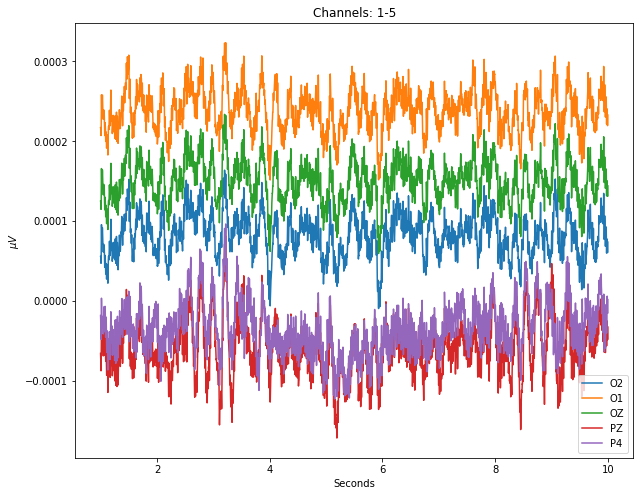

In [ ]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = data_raw.info['sfreq']
sfreq = data_raw.info['sfreq']
data, times = data_raw[:5, int(sfreq * 1):int(sfreq * 10)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T)
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-5')
plt.legend(data_raw.ch_names[:5])

### mne plots
There are many nice plotting options included in mne. They are, however, not always interactive and fully functional in Jupyter notebooks... so better try them out from a python script.

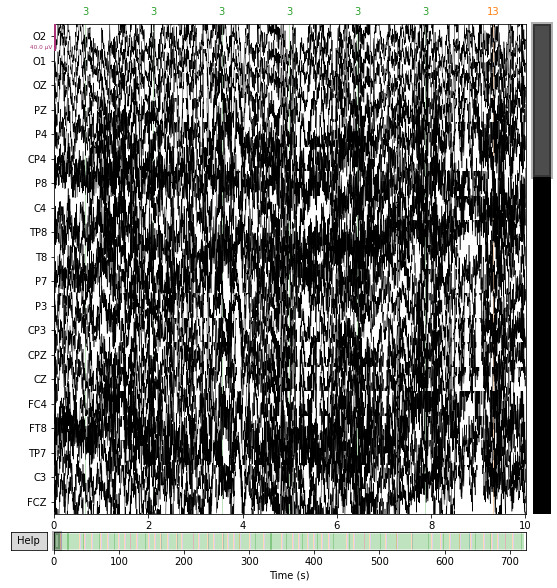

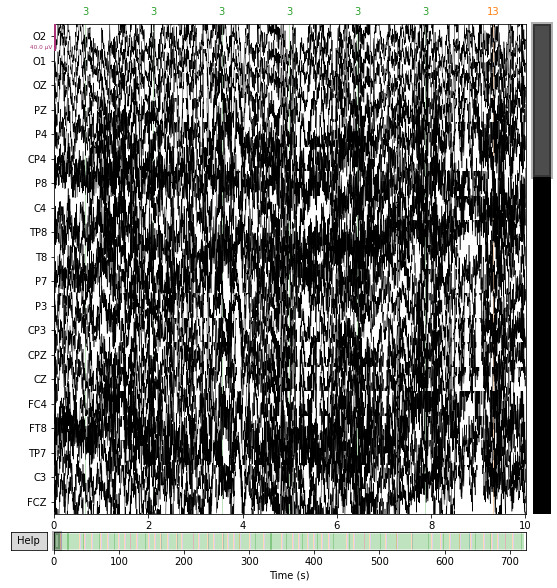

In [ ]:
data_raw.plot(duration=10, block=True)

### Look at events 
(encoded in 'STI 014' channel)

In [ ]:
# get the events (read from 'STI 014' channel)
events = mne.find_events(data_raw, shortest_event=0, stim_channel='STI 014', verbose=False)
print(events[:10,:])

ValueError: No stim channel found to extract event triggers.

In [ ]:
# Check which unique event indentifiers there are
unique_event_types = set(events[:,2])
print(unique_event_types)

NameError: name 'events' is not defined

### Display signal around one type of event
Selects signal for specific event ID and plots time window from tmin to tmax.

In [ ]:
event_id = [3, 13, 66] # select events for the given event IDs
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5  # end of each epoch (500ms after the trigger)

baseline = (None, 0)  # means from the first instant to t = 0
picks = mne.pick_types(data_raw.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')

epochs = mne.Epochs(data_raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=baseline, preload=True, verbose=False)

# remove channels that aren't eeg electrodes we care about
#epochs.drop_channels(ch_names=['Nose', 'REOG', 'LEOG', 'IEOG', 'SEOG', 'M1', 'M2','EXG8'])

# Export data in tabular structure as a pandas DataFrame.
epochs_df = epochs.to_data_frame()

evoked = epochs['66'].average()
evoked.plot();

NameError: name 'events' is not defined

In [ ]:
epochs_df.head()

NameError: name 'epochs_df' is not defined

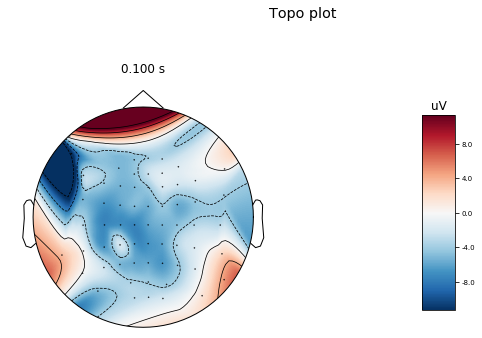

In [12]:
# Spatial plot:
evoked.plot_topomap(times=[0.1], size=3., title="Topo plot", time_unit='s');

### Plot topomaps for different time points

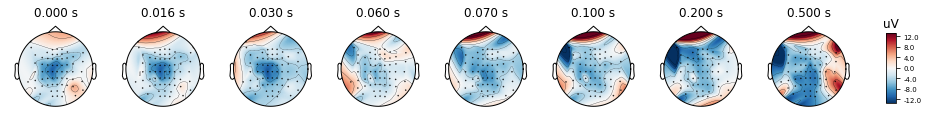

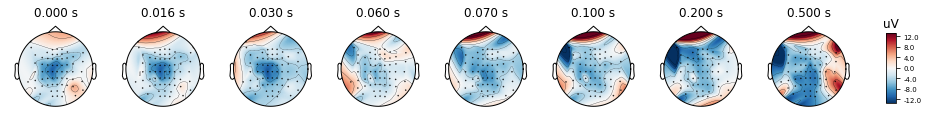

In [13]:
evoked.plot_topomap(times=np.array([0, 0.016, 0.030, 0.060, 0.070, 0.1, 0.2, 0.5]), time_unit='s')

### Test other event type

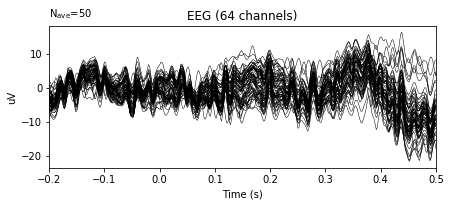

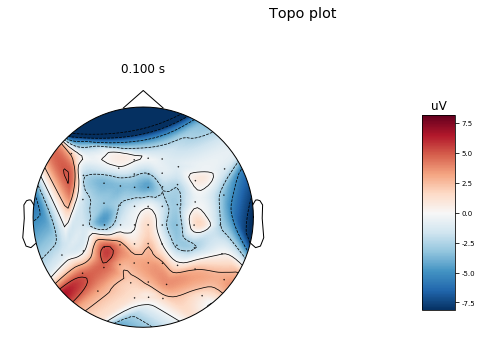

In [14]:
evoked = epochs['13'].average()
evoked.plot();
evoked.plot_topomap(times=[0.1], size=3., title="Topo plot", time_unit='s');

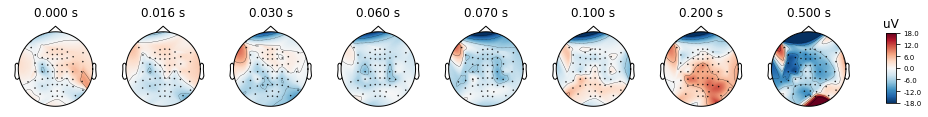

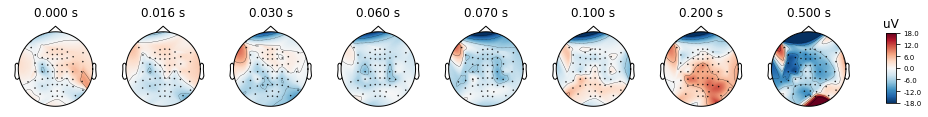

In [15]:
evoked.plot_topomap(times=np.array([0, 0.016, 0.030, 0.060, 0.070, 0.1, 0.2, 0.5]), time_unit='s')